## Biot-Savart law

$$B(r_1) = \frac{\mu_0}{4 \pi} \int \frac{j(r_2) \times (r_1-r_2)}{\left|r_1-r_2\right|}$$

Using the current density $j$ of a wire at position $(x_n, y_n)$ carrying the current $I_n$):

$$ j_n(r) = I_n\left[0,0,\delta(x-x_n)\delta(y-y_n)\right] $$

we calculate the magnetic field at (x,y) to be the sum of the individual magnetic fields induced by each wire:

$$ \vec B(x,y,I_n,x_n,y_n) = \sum_n \left( \begin{matrix} \frac{-\mu_0}{4 \pi \left| x-x_n\right|²} I_n (y-y_n) \\  \frac{\mu_0}{4 \pi\left| x-x_n\right|²} I_n (x-x_n) \end{matrix} \right) $$

## 4.1 A simple dipole
This can be quickly implemented into python code:

We choose 4 wires. Two of them carry current that goes into the plane (marked by an "x"), and two of them carry current that comes out of the plane (marked by a dot)

Field strength at origin:  40.0 μT


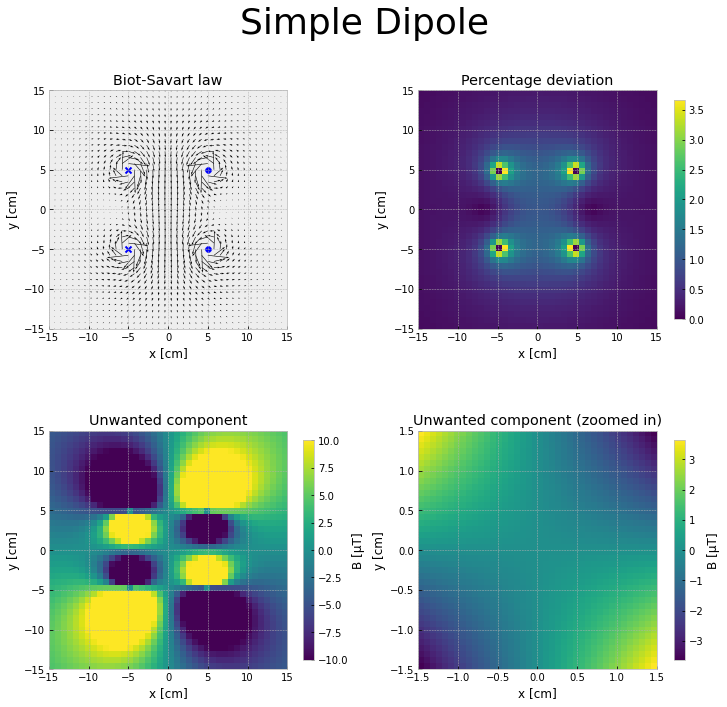

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

n_wires = 4
mu_0 = 4*np.pi*1e-1
wire_positions = np.array([[5,5],[5,-5],[-5,-5],[-5,5]])
I = 1000*np.array([1,1,-1,-1])
res = 40 # plot resolution: higher resolution means more arrows
size = 15 # Plot a window around the center of the wires with this size
xaxis, yaxis = np.linspace(-size,size,res), np.linspace(-size,size,res)
field_matrix_x = np.ndarray((res,res))
field_matrix_y = np.ndarray((res,res))

def biot_savart(x,y):
    Bx, By = 0, 0
    for wire in range(n_wires):
        norm = np.linalg.norm([x,y]-wire_positions[wire])
        if norm == 0: return 0,0
        Bx+=I[wire]*(-mu_0)/4/np.pi*(y-wire_positions[wire][1])/norm**2
        By+=I[wire]*(mu_0)/4/np.pi*(x-wire_positions[wire][0])/norm**2
    return Bx, By

# Calculate the field strength at the origin
origin = np.linalg.norm(biot_savart(0,0))
print('Field strength at origin: ',np.round(origin,2),'μT')

# Calculate Vector field
for yi in range(res):
    for xi in range(res):
        field_matrix_x[yi][xi], field_matrix_y[yi][xi] = biot_savart(xaxis[xi],yaxis[yi])

# Calculate percentage deviation
perdev = np.ndarray((res,res))
for yi in range(res):
    for xi in range(res):
        field_strength = np.linalg.norm((field_matrix_x[yi][xi],field_matrix_y[yi][xi]))
        perdev[yi][xi] = field_strength/origin

# Calculate wrong component
wrong = np.ndarray((res,res))
wrong_zoom = np.ndarray((res,res))
x_zoom, y_zoom = np.linspace(-size/10,size/10,res), np.linspace(-size/10,size/10,res)
for yi in range(res):
    for xi in range(res):
        wrong[yi][xi] = biot_savart(xaxis[xi],yaxis[yi])[0] # x is the unwanted component
for yi in range(res):
    for xi in range(res):
        wrong_zoom[yi][xi] = biot_savart(x_zoom[xi],y_zoom[yi])[0] # x is the unwanted component


fig, axs = plt.subplots(2,2, constrained_layout=True,figsize=(10,10))
fig.suptitle('Simple Dipole',fontsize=36)

##### PLOT SECTION 1: VECTOR FIELD #####

# Draw Wires
for i in enumerate(wire_positions):
    if I[i[0]] >= 0:
        axs[0][0].scatter(i[1][0],i[1][1],marker='o',color='blue')
    else:
        axs[0][0].scatter(i[1][0],i[1][1],marker='x',color='blue')

# Draw Field
axs[0][0].quiver(xaxis,yaxis,field_matrix_x,field_matrix_y)
axs[0][0].set_aspect(1)
axs[0][0].set_title('Biot-Savart law')
axs[0][0].set_xlim(-size,size)
axs[0][0].set_ylim(-size,size)
axs[0][0].set_xlabel('x [cm]')
axs[0][0].set_ylabel('y [cm]')

##### PLOT SECTION 2: PERCENTAGE DEVIATION #####

pos1 = axs[0][1].imshow(perdev,extent = [-size,size,-size,size])
fig.colorbar(pos1, ax=axs[0][1],fraction=0.046,pad=0.04)
axs[0][1].set_title('Percentage deviation')
axs[0][1].set_xlim(-size,size)
axs[0][1].set_ylim(-size,size)
axs[0][1].set_xlabel('x [cm]')
axs[0][1].set_ylabel('y [cm]')

##### PLOT SECTION: WRONG COMPONENT #####
pos2 = axs[1][0].imshow(wrong,extent = [-size,size,-size,size],vmin=-10,vmax=10)
fig.colorbar(pos2, ax=axs[1][0],fraction=0.046,pad=0.04,label='B [μT]')
axs[1][0].set_title('Unwanted component')
axs[1][0].set_xlim(-size,size)
axs[1][0].set_ylim(-size,size)
axs[1][0].set_xlabel('x [cm]')
axs[1][0].set_ylabel('y [cm]')

##### PLOT SECTION: WRONG COMPONENT (ZOOMED IN) #####
pos3 = axs[1][1].imshow(wrong_zoom,extent = [-size/10,size/10,-size/10,size/10])
fig.colorbar(pos3, ax=axs[1][1],fraction=0.046,pad=0.04,label='B [μT]')
axs[1][1].set_title('Unwanted component (zoomed in)')
axs[1][1].set_xlim(-size/10,size/10)
axs[1][1].set_ylim(-size/10,size/10)
axs[1][1].set_xlabel('x [cm]')
axs[1][1].set_ylabel('y [cm]')
plt.show()

Now let's do the same for a slightly more complex magnet. We order our wires in a circle from $ \left[-\phi_{max}/2, \phi_{max}/2\right]$. We play around with the angle $\phi$

Field strength at origin:  6219.73 μT


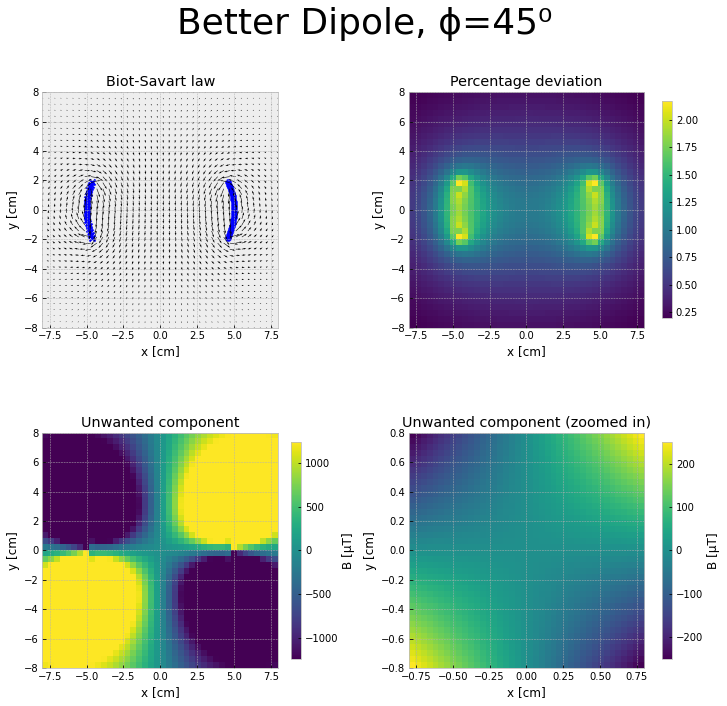

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

n_wires = 20
mu_0 = 4*np.pi*1e-1
# Calculate wire positions
I = np.ndarray((2*n_wires))
R = 5
wire_positions = np.ndarray((2*n_wires,2))
wire_angle = 45
wire_angle_rad = np.deg2rad(wire_angle)
lin = np.linspace(-wire_angle_rad/2,wire_angle_rad/2,n_wires)
for i in range(n_wires):
    wire_positions[i][0] = R*np.cos(lin[i])
    wire_positions[i][1] = R*np.sin(lin[i])
    wire_positions[i+n_wires][0] = -R*np.cos(lin[i])
    wire_positions[i+n_wires][1] = R*np.sin(lin[i])
    I[i] , I[i+n_wires] = 8000, -8000

res = 40 # plot resolution: higher resolution means more arrows
size = 8 # Plot a window around the center of the wires with this size
xaxis, yaxis = np.linspace(-size,size,res), np.linspace(-size,size,res)
field_matrix_x = np.ndarray((res,res))
field_matrix_y = np.ndarray((res,res))


def biot_savart(x,y):
    Bx, By = 0, 0
    for wire in range(2*n_wires):
        norm = np.linalg.norm([x,y]-wire_positions[wire])
        if norm == 0: return 0,0
        Bx+=I[wire]*(-mu_0)/4/np.pi*(y-wire_positions[wire][1])/norm**2
        By+=I[wire]*(mu_0)/4/np.pi*(x-wire_positions[wire][0])/norm**2
    return Bx, By

# Calculate the field strength at the origin
origin = np.linalg.norm(biot_savart(0,0))
print('Field strength at origin: ',np.round(origin,2),'μT')


# Calculate Vector field
for yi in range(res):
    for xi in range(res):
        field_matrix_x[yi][xi], field_matrix_y[yi][xi] = biot_savart(xaxis[xi],yaxis[yi])

# Calculate percentage deviation
perdev = np.ndarray((res,res))
for yi in range(res):
    for xi in range(res):
        field_strength = np.linalg.norm((field_matrix_x[yi][xi],field_matrix_y[yi][xi]))
        perdev[yi][xi] = field_strength/origin

# Calculate wrong component
wrong = np.ndarray((res,res))
wrong_zoom = np.ndarray((res,res))
x_zoom, y_zoom = np.linspace(-size/10,size/10,res), np.linspace(-size/10,size/10,res)
for yi in range(res):
    for xi in range(res):
        wrong[yi][xi] = biot_savart(xaxis[xi],yaxis[yi])[0] # x is the unwanted component
for yi in range(res):
    for xi in range(res):
        wrong_zoom[yi][xi] = biot_savart(x_zoom[xi],y_zoom[yi])[0] # x is the unwanted component


fig, axs = plt.subplots(2,2, constrained_layout=True,figsize=(10,10))
fig.suptitle('Better Dipole, ϕ={}⁰'.format(wire_angle),fontsize=36)

##### PLOT SECTION 1: VECTOR FIELD #####

# Draw Wires
for i in enumerate(wire_positions):
    if I[i[0]] >= 0:
        axs[0][0].scatter(i[1][0],i[1][1],marker='o',color='blue')
    else:
        axs[0][0].scatter(i[1][0],i[1][1],marker='x',color='blue')

# Draw Field
axs[0][0].quiver(xaxis,yaxis,field_matrix_x,field_matrix_y)
axs[0][0].set_aspect(1)
axs[0][0].set_title('Biot-Savart law')
axs[0][0].set_xlim(-size,size)
axs[0][0].set_ylim(-size,size)
axs[0][0].set_xlabel('x [cm]')
axs[0][0].set_ylabel('y [cm]')

##### PLOT SECTION 2: PERCENTAGE DEVIATION #####

pos1 = axs[0][1].imshow(perdev,extent = [-size,size,-size,size])
fig.colorbar(pos1, ax=axs[0][1],fraction=0.046,pad=0.04)
axs[0][1].set_title('Percentage deviation')
axs[0][1].set_xlim(-size,size)
axs[0][1].set_ylim(-size,size)
axs[0][1].set_xlabel('x [cm]')
axs[0][1].set_ylabel('y [cm]')

##### PLOT SECTION: WRONG COMPONENT #####
pos2 = axs[1][0].imshow(wrong,extent = [-size,size,-size,size],vmin=-origin/5,vmax=origin/5)
fig.colorbar(pos2, ax=axs[1][0],fraction=0.046,pad=0.04,label='B [μT]')
axs[1][0].set_title('Unwanted component')
axs[1][0].set_xlim(-size,size)
axs[1][0].set_ylim(-size,size)
axs[1][0].set_xlabel('x [cm]')
axs[1][0].set_ylabel('y [cm]')

##### PLOT SECTION: WRONG COMPONENT (ZOOMED IN) #####
pos3 = axs[1][1].imshow(wrong_zoom,extent = [-size/10,size/10,-size/10,size/10])
fig.colorbar(pos3, ax=axs[1][1],fraction=0.046,pad=0.04,label='B [μT]')
axs[1][1].set_title('Unwanted component (zoomed in)')
axs[1][1].set_xlim(-size/10,size/10)
axs[1][1].set_ylim(-size/10,size/10)
axs[1][1].set_xlabel('x [cm]')
axs[1][1].set_ylabel('y [cm]')
plt.show()


Field strength at origin:  6081.63 μT


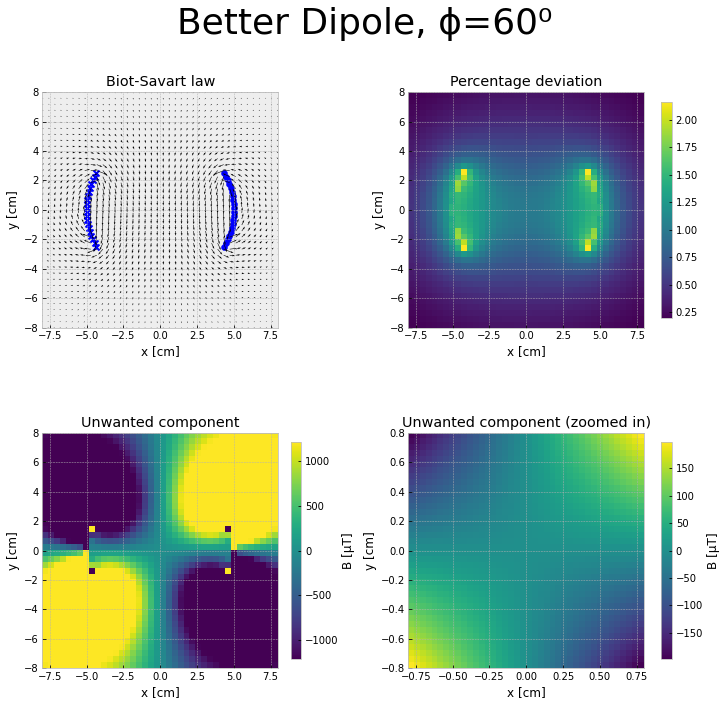

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

n_wires = 20
mu_0 = 4*np.pi*1e-1
# Calculate wire positions
I = np.ndarray((2*n_wires))
R = 5
wire_positions = np.ndarray((2*n_wires,2))
wire_angle = 60
wire_angle_rad = np.deg2rad(wire_angle)
lin = np.linspace(-wire_angle_rad/2,wire_angle_rad/2,n_wires)
for i in range(n_wires):
    wire_positions[i][0] = R*np.cos(lin[i])
    wire_positions[i][1] = R*np.sin(lin[i])
    wire_positions[i+n_wires][0] = -R*np.cos(lin[i])
    wire_positions[i+n_wires][1] = R*np.sin(lin[i])
    I[i] , I[i+n_wires] = 8000, -8000

res = 40 # plot resolution: higher resolution means more arrows
size = 8 # Plot a window around the center of the wires with this size
xaxis, yaxis = np.linspace(-size,size,res), np.linspace(-size,size,res)
field_matrix_x = np.ndarray((res,res))
field_matrix_y = np.ndarray((res,res))


def biot_savart(x,y):
    Bx, By = 0, 0
    for wire in range(2*n_wires):
        norm = np.linalg.norm([x,y]-wire_positions[wire])
        if norm == 0: return 0,0
        Bx+=I[wire]*(-mu_0)/4/np.pi*(y-wire_positions[wire][1])/norm**2
        By+=I[wire]*(mu_0)/4/np.pi*(x-wire_positions[wire][0])/norm**2
    return Bx, By

# Calculate the field strength at the origin
origin = np.linalg.norm(biot_savart(0,0))
print('Field strength at origin: ',np.round(origin,2),'μT')


# Calculate Vector field
for yi in range(res):
    for xi in range(res):
        field_matrix_x[yi][xi], field_matrix_y[yi][xi] = biot_savart(xaxis[xi],yaxis[yi])

# Calculate percentage deviation
perdev = np.ndarray((res,res))
for yi in range(res):
    for xi in range(res):
        field_strength = np.linalg.norm((field_matrix_x[yi][xi],field_matrix_y[yi][xi]))
        perdev[yi][xi] = field_strength/origin

# Calculate wrong component
wrong = np.ndarray((res,res))
wrong_zoom = np.ndarray((res,res))
x_zoom, y_zoom = np.linspace(-size/10,size/10,res), np.linspace(-size/10,size/10,res)
for yi in range(res):
    for xi in range(res):
        wrong[yi][xi] = biot_savart(xaxis[xi],yaxis[yi])[0] # x is the unwanted component
for yi in range(res):
    for xi in range(res):
        wrong_zoom[yi][xi] = biot_savart(x_zoom[xi],y_zoom[yi])[0] # x is the unwanted component


fig, axs = plt.subplots(2,2, constrained_layout=True,figsize=(10,10))
fig.suptitle('Better Dipole, ϕ={}⁰'.format(wire_angle),fontsize=36)

##### PLOT SECTION 1: VECTOR FIELD #####

# Draw Wires
for i in enumerate(wire_positions):
    if I[i[0]] >= 0:
        axs[0][0].scatter(i[1][0],i[1][1],marker='o',color='blue')
    else:
        axs[0][0].scatter(i[1][0],i[1][1],marker='x',color='blue')

# Draw Field
axs[0][0].quiver(xaxis,yaxis,field_matrix_x,field_matrix_y)
axs[0][0].set_aspect(1)
axs[0][0].set_title('Biot-Savart law')
axs[0][0].set_xlim(-size,size)
axs[0][0].set_ylim(-size,size)
axs[0][0].set_xlabel('x [cm]')
axs[0][0].set_ylabel('y [cm]')

##### PLOT SECTION 2: PERCENTAGE DEVIATION #####

pos1 = axs[0][1].imshow(perdev,extent = [-size,size,-size,size])
fig.colorbar(pos1, ax=axs[0][1],fraction=0.046,pad=0.04)
axs[0][1].set_title('Percentage deviation')
axs[0][1].set_xlim(-size,size)
axs[0][1].set_ylim(-size,size)
axs[0][1].set_xlabel('x [cm]')
axs[0][1].set_ylabel('y [cm]')

##### PLOT SECTION: WRONG COMPONENT #####
pos2 = axs[1][0].imshow(wrong,extent = [-size,size,-size,size],vmin=-origin/5,vmax=origin/5)
fig.colorbar(pos2, ax=axs[1][0],fraction=0.046,pad=0.04,label='B [μT]')
axs[1][0].set_title('Unwanted component')
axs[1][0].set_xlim(-size,size)
axs[1][0].set_ylim(-size,size)
axs[1][0].set_xlabel('x [cm]')
axs[1][0].set_ylabel('y [cm]')

##### PLOT SECTION: WRONG COMPONENT (ZOOMED IN) #####
pos3 = axs[1][1].imshow(wrong_zoom,extent = [-size/10,size/10,-size/10,size/10])
fig.colorbar(pos3, ax=axs[1][1],fraction=0.046,pad=0.04,label='B [μT]')
axs[1][1].set_title('Unwanted component (zoomed in)')
axs[1][1].set_xlim(-size/10,size/10)
axs[1][1].set_ylim(-size/10,size/10)
axs[1][1].set_xlabel('x [cm]')
axs[1][1].set_ylabel('y [cm]')
plt.show()


Field strength at origin:  5697.08 μT


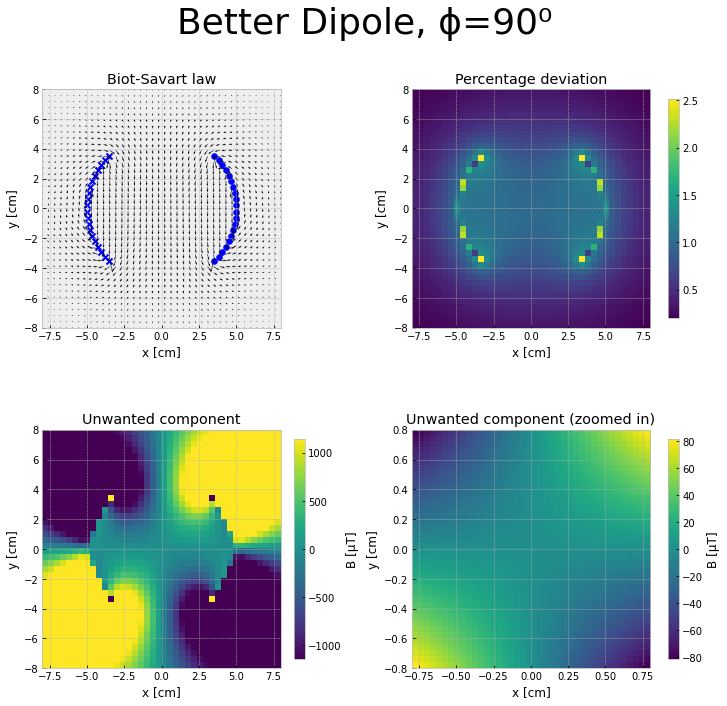

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

n_wires = 20
mu_0 = 4*np.pi*1e-1
# Calculate wire positions
I = np.ndarray((2*n_wires))
R = 5
wire_positions = np.ndarray((2*n_wires,2))
wire_angle = 90
wire_angle_rad = np.deg2rad(wire_angle)
lin = np.linspace(-wire_angle_rad/2,wire_angle_rad/2,n_wires)
for i in range(n_wires):
    wire_positions[i][0] = R*np.cos(lin[i])
    wire_positions[i][1] = R*np.sin(lin[i])
    wire_positions[i+n_wires][0] = -R*np.cos(lin[i])
    wire_positions[i+n_wires][1] = R*np.sin(lin[i])
    I[i] , I[i+n_wires] = 8000, -8000

res = 40 # plot resolution: higher resolution means more arrows
size = 8 # Plot a window around the center of the wires with this size
xaxis, yaxis = np.linspace(-size,size,res), np.linspace(-size,size,res)
field_matrix_x = np.ndarray((res,res))
field_matrix_y = np.ndarray((res,res))


def biot_savart(x,y):
    Bx, By = 0, 0
    for wire in range(2*n_wires):
        norm = np.linalg.norm([x,y]-wire_positions[wire])
        if norm == 0: return 0,0
        Bx+=I[wire]*(-mu_0)/4/np.pi*(y-wire_positions[wire][1])/norm**2
        By+=I[wire]*(mu_0)/4/np.pi*(x-wire_positions[wire][0])/norm**2
    return Bx, By

# Calculate the field strength at the origin
origin = np.linalg.norm(biot_savart(0,0))
print('Field strength at origin: ',np.round(origin,2),'μT')


# Calculate Vector field
for yi in range(res):
    for xi in range(res):
        field_matrix_x[yi][xi], field_matrix_y[yi][xi] = biot_savart(xaxis[xi],yaxis[yi])

# Calculate percentage deviation
perdev = np.ndarray((res,res))
for yi in range(res):
    for xi in range(res):
        field_strength = np.linalg.norm((field_matrix_x[yi][xi],field_matrix_y[yi][xi]))
        perdev[yi][xi] = field_strength/origin

# Calculate wrong component
wrong = np.ndarray((res,res))
wrong_zoom = np.ndarray((res,res))
x_zoom, y_zoom = np.linspace(-size/10,size/10,res), np.linspace(-size/10,size/10,res)
for yi in range(res):
    for xi in range(res):
        wrong[yi][xi] = biot_savart(xaxis[xi],yaxis[yi])[0] # x is the unwanted component
for yi in range(res):
    for xi in range(res):
        wrong_zoom[yi][xi] = biot_savart(x_zoom[xi],y_zoom[yi])[0] # x is the unwanted component


fig, axs = plt.subplots(2,2, constrained_layout=True,figsize=(10,10))
fig.suptitle('Better Dipole, ϕ={}⁰'.format(wire_angle),fontsize=36)

##### PLOT SECTION 1: VECTOR FIELD #####

# Draw Wires
for i in enumerate(wire_positions):
    if I[i[0]] >= 0:
        axs[0][0].scatter(i[1][0],i[1][1],marker='o',color='blue')
    else:
        axs[0][0].scatter(i[1][0],i[1][1],marker='x',color='blue')

# Draw Field
axs[0][0].quiver(xaxis,yaxis,field_matrix_x,field_matrix_y)
axs[0][0].set_aspect(1)
axs[0][0].set_title('Biot-Savart law')
axs[0][0].set_xlim(-size,size)
axs[0][0].set_ylim(-size,size)
axs[0][0].set_xlabel('x [cm]')
axs[0][0].set_ylabel('y [cm]')

##### PLOT SECTION 2: PERCENTAGE DEVIATION #####

pos1 = axs[0][1].imshow(perdev,extent = [-size,size,-size,size])
fig.colorbar(pos1, ax=axs[0][1],fraction=0.046,pad=0.04)
axs[0][1].set_title('Percentage deviation')
axs[0][1].set_xlim(-size,size)
axs[0][1].set_ylim(-size,size)
axs[0][1].set_xlabel('x [cm]')
axs[0][1].set_ylabel('y [cm]')

##### PLOT SECTION: WRONG COMPONENT #####
pos2 = axs[1][0].imshow(wrong,extent = [-size,size,-size,size],vmin=-origin/5,vmax=origin/5)
fig.colorbar(pos2, ax=axs[1][0],fraction=0.046,pad=0.04,label='B [μT]')
axs[1][0].set_title('Unwanted component')
axs[1][0].set_xlim(-size,size)
axs[1][0].set_ylim(-size,size)
axs[1][0].set_xlabel('x [cm]')
axs[1][0].set_ylabel('y [cm]')

##### PLOT SECTION: WRONG COMPONENT (ZOOMED IN) #####
pos3 = axs[1][1].imshow(wrong_zoom,extent = [-size/10,size/10,-size/10,size/10])
fig.colorbar(pos3, ax=axs[1][1],fraction=0.046,pad=0.04,label='B [μT]')
axs[1][1].set_title('Unwanted component (zoomed in)')
axs[1][1].set_xlim(-size/10,size/10)
axs[1][1].set_ylim(-size/10,size/10)
axs[1][1].set_xlabel('x [cm]')
axs[1][1].set_ylabel('y [cm]')
plt.show()


From this test, we can observe the effects that the shape of the magnet has onto the field strength and the purity of the magnetic dipole.

Increasing the wire angle $\phi$ yields a smaller unwanted component in the center, while decreasing the magnetic field strength. On the other hand, if the wire angle is decreased, the field becomes much stronger in the center, but the dipole loses purity, and larger and larger fields in x-direction are introduced.